In [1]:
!pip install kaggle

In [2]:
#configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
#dataset api
!kaggle datasets download -d omkargurav/face-mask-dataset

face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
#extracting the compresed dataset
from zipfile import ZipFile
dataset='/content/face-mask-dataset.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('the dataset is extracted')

the dataset is extracted


In [5]:
!ls

data		       kaggle.json  mask3.jpeg	nomask1.jpeg  nomask4.jpeg  sample_data
face-mask-dataset.zip  mask2.jpeg   mask.jpeg	nomask3.jpeg  nomask.jpeg


Importing the dependencies

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
with_mask_files=os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])

['with_mask_2172.jpg', 'with_mask_1882.jpg', 'with_mask_2006.jpg', 'with_mask_97.jpg', 'with_mask_3636.jpg']


In [8]:
without_mask_files=os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])

['without_mask_3341.jpg', 'without_mask_1907.jpg', 'without_mask_3083.jpg', 'without_mask_2094.jpg', 'without_mask_2152.jpg']


In [9]:
print('number of images with mask :', len(with_mask_files))
print('number of images without mask :', len(without_mask_files))


number of images with mask : 3725
number of images without mask : 3828


Creating Labels

Image with mask->1
Image without mask ->0

In [10]:
#creating the labels
#creating two lists
with_mask_labels= [1]*3725  #creates a list with 1 as a value and when multiplied with 3725 it creates a list with 3725 elements all with values one
without_mask_labels=[0]*3828

In [11]:
#combining both labels
labels= with_mask_labels + without_mask_labels
print(len(labels))

7553


Displaying the images


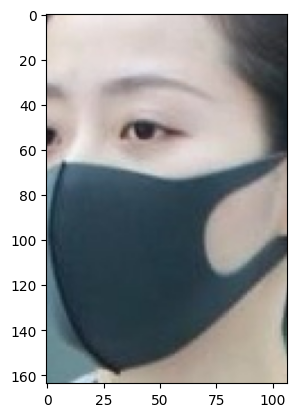

In [12]:
#displaying with mask image
img=mpimg.imread('/content/data/with_mask/with_mask_1345.jpg')
imgplot=plt.imshow(img)
plt.show()

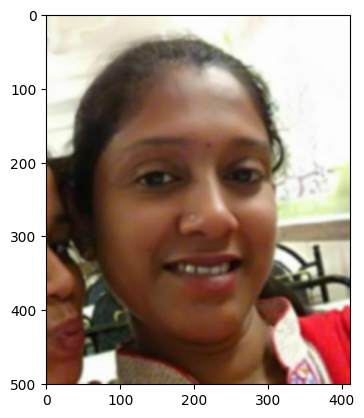

In [13]:
#displaying without mask
img=mpimg.imread('/content/data/without_mask/without_mask_1345.jpg')
imgplot=plt.imshow(img)
plt.show()

Image processing

1.resize the images
2.convert the images to numpy arrays


In [14]:
#convert the images to numpy arrays
#for with mask
with_mask_path='/content/data/with_mask/'
data=[]

for img_file in with_mask_files:
  image= Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)

#for without mask
without_mask_path='/content/data/without_mask/'


for img_file in without_mask_files:
  image= Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [15]:
type(data)

list

In [16]:
len(data)

7553

In [17]:
type(data[0])

numpy.ndarray

In [18]:
# converting image list and label list to numpy arrays

x=np.array(data)
y=np.array(labels)

In [19]:
print(x.shape)

(7553, 128, 128, 3)


In [20]:
print(y.shape)

(7553,)


Train Test Split

In [21]:
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2, random_state=5)

In [22]:
print(x.shape, x_train.shape, x_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [23]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [24]:
x_train_scaled[0]

array([[[0.46666667, 0.43921569, 0.40784314],
        [0.47058824, 0.44313725, 0.41176471],
        [0.4745098 , 0.44705882, 0.41568627],
        ...,
        [0.57647059, 0.55686275, 0.48627451],
        [0.58431373, 0.55686275, 0.49803922],
        [0.5254902 , 0.49411765, 0.45098039]],

       [[0.47058824, 0.44313725, 0.41176471],
        [0.4745098 , 0.44705882, 0.41568627],
        [0.47843137, 0.45098039, 0.41960784],
        ...,
        [0.58039216, 0.55686275, 0.49019608],
        [0.58823529, 0.56470588, 0.50588235],
        [0.53333333, 0.50196078, 0.45882353]],

       [[0.4745098 , 0.44705882, 0.41568627],
        [0.47843137, 0.45098039, 0.41960784],
        [0.48235294, 0.45490196, 0.42352941],
        ...,
        [0.58431373, 0.56078431, 0.49411765],
        [0.6       , 0.57254902, 0.51372549],
        [0.54901961, 0.51372549, 0.47058824]],

       ...,

       [[0.74117647, 0.71372549, 0.64313725],
        [0.75294118, 0.7254902 , 0.6627451 ],
        [0.68627451, 0

Building a convolutional neural network(cnn)

In [25]:
import tensorflow as tf
from tensorflow import keras

In [26]:
num_of_classes=2

model=keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))


In [27]:
#compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [28]:
#training the neural network
history=model.fit(x_train_scaled, y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 10s 25ms/step - loss: 0.4697 - acc: 0.8060 - val_loss: 0.2506 - val_acc: 0.8810
Epoch 2/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2730 - acc: 0.8948 - val_loss: 0.2413 - val_acc: 0.8942
Epoch 3/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2360 - acc: 0.9128 - val_loss: 0.2207 - val_acc: 0.9058
Epoch 4/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1988 - acc: 0.9233 - val_loss: 0.2078 - val_acc: 0.9091
Epoch 5/5
170/170 [==============================] - 3s 18ms/step - loss: 0.1593 - acc: 0.9428 - val_loss: 0.2765 - val_acc: 0.9157


In [29]:
loss, accuracy=model.evaluate(x_test_scaled, y_test)
print('test accuracy=', accuracy)

48/48 [==============================] - 1s 25ms/step - loss: 0.2771 - acc: 0.9100
test accuracy= 0.9099934101104736


building a predictive system

/content/nomask5.jpeg


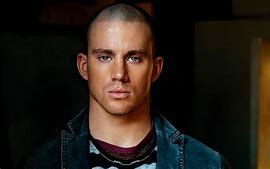

1/1 [==============================] - 0s 18ms/step
[[0.7634193 0.2766134]]
0
the preson in the image is not wearing a mask


In [31]:
input_image_path=input('')

input_image=cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resized=cv2.resize(input_image,(128,128))

input_image_scaled=input_image_resized/255
input_image_reshaped=np.reshape(input_image_scaled, [1,128,128,3])
input_prediction=model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label=np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label==1:
  print('the person in the image is wearing a mask')

else:
  print('the preson in the image is not wearing a mask')

